![example](images/director_shot.jpeg)

# Movie Analysis

**Authors:** Wesley Yu
***

## Overview

This project analyzes data from various movie databases. Exploratory data analysis of the database shows how trends in movie release dates, genres, and production budget can effect the movie's worldwide box office results. Microsoft can use this analysis to help decide which film projects to take on.

## Business Problem

Microsoft is taking their first step into the movie business and will need to sift through an enourmous amount of scripts 
to find a profitable project to take on. Using data from movie databases, we can find patterns and trends that can help Microsoft narrow down their choices.


## Data Understanding

In this project, we will be looking at datasets from two sources. The Numbers and TMDB.
The Numbers has been tracking data about the movie industry since 1997, having the most up to date information on box office numbers and movie financials.
TMDB is a community built and backed database on movies and TV shows. Data is constanly added and updated by a strong community that is passionate about movie and TV show data.

The Numbers dataset we are working with has records from 1915 to 2020. Data on various movie's production budget, domestic, and worldwide gross box office numbers are included.

TMDB dataset includes records from 1930 to 2020. Every movie has a unique TMDB ID associated to them. The dataset provides
genre ids, popularity, and movie rating based off their community.

We will be combining these two datasets to match movie financials with there respective genres from the past 10 years.


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import json

%matplotlib inline

In [2]:
# Open numbers database and examine first 5 records
numdf = pd.read_csv('Data/tn.movie_budgets.csv.gz')
numdf.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
numdf.info() # no missing values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


I want to look at records from 2010 and onwards to find any patterns in more recent movies. Change <code>release_date</code> to datetime type.

In [4]:
numdf['release_date'] = pd.to_datetime(numdf['release_date'])
numdf = numdf[numdf['release_date'].dt.year > 2009]

Values in <code>production_budget</code> and <code>worldwide_gross</code> are strings, we will need to change them to int for analysis.

In [5]:
numdf['production_budget'] = numdf['production_budget'].map(lambda x: int(x.strip('$').replace(',','')))
numdf['worldwide_gross'] = numdf['worldwide_gross'].map(lambda x: int(x.strip('$').replace(',','')))

In [6]:
# Open numbers database and examine first 5 records
tmdf = pd.read_csv('Data/tmdb.movies.csv.gz')
tmdf.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
tmdf.info()  # no missing values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [8]:
tmdf['release_date'] = pd.to_datetime(tmdf['release_date'])
tmdf = tmdf[tmdf['release_date'].dt.year > 2009]

## Data Preparation

### Data Cleaning 

For both datasets, I check for any duplicates and drop them if found. Unnecessary columns are dropped and column names are renamed to make working on them easier.

In [9]:
# Check for any duplicates based on release year and movie name
numdf.value_counts(['release_date', 'movie'])

release_date  movie                  
2020-12-31    Moonfall                   1
2012-11-16    Silver Linings Playbook    1
2012-11-30    Killing Them Softly        1
2012-11-23    De rouille et dâos       1
2012-11-21    Rise of the Guardians      1
                                        ..
2015-09-11    90 Minutes in Heaven       1
              The Perfect Guy            1
              The Visit                  1
2015-09-18    Black Mass                 1
2010-01-08    Daybreakers                1
Length: 2194, dtype: int64

In [10]:
# Check for any duplicates based on unique id
tmdf['id'].value_counts()

152044    3
378425    3
402448    3
192767    3
192023    3
         ..
350846    1
479871    1
500353    1
439007    1
524288    1
Name: id, Length: 25288, dtype: int64

In [11]:
tmdf[tmdf['id'] == 152044]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
5532,5532,"[53, 16, 14]",152044,ja,劇場版 魔法少女まどか☆マギカ[後編] 永遠の物語,6.393,2012-10-19,Puella Magi Madoka Magica the Movie Part II: E...,8.0,53
11484,11484,"[53, 16, 14]",152044,ja,劇場版 魔法少女まどか☆マギカ[後編] 永遠の物語,6.393,2012-10-19,Puella Magi Madoka Magica the Movie Part II: E...,8.0,53
17896,17896,"[53, 16, 14]",152044,ja,劇場版 魔法少女まどか☆マギカ[後編] 永遠の物語,6.393,2012-10-19,Puella Magi Madoka Magica the Movie Part II: E...,8.0,53


In [12]:
tmdf[tmdf['id'] == 378425]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
16405,16405,[99],378425,en,Here Come the Videofreex,0.631,2015-06-21,Here Come the Videofreex,8.0,1
19789,19789,[99],378425,en,Here Come the Videofreex,0.631,2015-06-21,Here Come the Videofreex,8.0,1
23048,23048,[99],378425,en,Here Come the Videofreex,0.631,2015-06-21,Here Come the Videofreex,8.0,1


In [13]:
tmdf[tmdf['id'] == 192767]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
12217,12217,[18],192767,en,Noble,1.819,2015-05-08,Noble,6.8,16
15362,15362,[18],192767,en,Noble,1.819,2015-05-08,Noble,6.8,16
18646,18646,[18],192767,en,Noble,1.819,2015-05-08,Noble,6.8,16


After examining some of the duplicates found, I concluded that they are the same records and can drop them.

In [14]:
tmdf = tmdf.drop_duplicates(subset = 'id', keep = 'first')

In [15]:
tmdf['id'].value_counts()

71677     1
226788    1
208091    1
67811     1
561546    1
         ..
64586     1
273488    1
97370     1
160859    1
524288    1
Name: id, Length: 25288, dtype: int64

In [16]:
tmdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25288 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         25288 non-null  int64         
 1   genre_ids          25288 non-null  object        
 2   id                 25288 non-null  int64         
 3   original_language  25288 non-null  object        
 4   original_title     25288 non-null  object        
 5   popularity         25288 non-null  float64       
 6   release_date       25288 non-null  datetime64[ns]
 7   title              25288 non-null  object        
 8   vote_average       25288 non-null  float64       
 9   vote_count         25288 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.1+ MB


In [17]:
# Drop uneccessary columns
numdf = numdf.drop(columns = ['id', 'domestic_gross'])
tmdf = tmdf.drop(columns = ['Unnamed: 0', 'original_language', 'title', 'popularity', 'vote_average', 'vote_count'])

In [18]:
# Rename movie title column to same name
numdf = numdf.rename(columns = {'movie': 'title'})
tmdf = tmdf.rename(columns = {'original_title': 'title'})

### Merging Datasets

After merging datasets, I change the <code>production_budget</code> and <code>worldwide_gross</code> to <code>int</code> datatype.

In [19]:
# Merge Numbers and TMDB on title and release date
df = numdf.merge(tmdf, on = ['title', 'release_date'])
df.head()

,release_date,title,production_budget,worldwide_gross,genre_ids,id
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,"[12, 28, 14]",1865
1,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,"[28, 12, 878]",99861
2,2018-04-27,Avengers: Infinity War,300000000,2048134200,"[12, 28, 14]",299536
3,2017-11-17,Justice League,300000000,655945209,"[28, 12, 14, 878]",141052
4,2015-11-06,Spectre,300000000,879620923,"[28, 12, 80]",206647


Merged dataset contains 1230 movies ranging from 2010 to 2019

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230 entries, 0 to 1229
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1230 non-null   datetime64[ns]
 1   title              1230 non-null   object        
 2   production_budget  1230 non-null   int64         
 3   worldwide_gross    1230 non-null   int64         
 4   genre_ids          1230 non-null   object        
 5   id                 1230 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 67.3+ KB


In [21]:
df['release_date'].describe()

<ipython-input-21-1fda778c69b5>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['release_date'].describe()


count                    1230
unique                    525
top       2015-11-20 00:00:00
freq                        7
first     2010-01-08 00:00:00
last      2019-05-03 00:00:00
Name: release_date, dtype: object

In [22]:
# Double check for any duplicates after merge
df['id'].value_counts()

71679     1
119450    1
47760     1
180296    1
86838     1
         ..
276905    1
64807     1
310569    1
286565    1
399360    1
Name: id, Length: 1230, dtype: int64

In [23]:
df['title'].value_counts()

Robin Hood                                         2
Hardflip                                           1
Jumanji: Welcome to the Jungle                     1
The Grey                                           1
Captain Phillips                                   1
                                                  ..
Warrior                                            1
Boyhood                                            1
R.L. Stine's Monsterville: The Cabinet of Souls    1
Pain & Gain                                        1
Left Behind                                        1
Name: title, Length: 1229, dtype: int64

In [24]:
df[df['title'] == 'Robin Hood']

,release_date,title,production_budget,worldwide_gross,genre_ids,id
23,2010-05-14,Robin Hood,210000000,322459006,"[28, 12, 18]",20662
181,2018-11-21,Robin Hood,99000000,84747441,"[12, 28, 53]",375588


## Data Analysis

I focus on three variables (<code>release_date</code>, <code>genre_ids</code>, and <code>production_budget</code>) and find a pattern with respect to <code>worldwide_gross</code>

#### Seasonal releases

I create a new column <code>month</code> to group up the release dates by months. Based on the results, movies release during the months of May, June, July, November, and December have a higher worldwide box office gross. These months are concurrent with the summer and holiday seasons.

In [25]:
# Create new column 'month' that returns the month of each release date
df['month'] = df['release_date'].dt.strftime('%b')

Based on the number of movies released by month. October had the most followed by September.

In [26]:
rm = df['month'].value_counts()
rm

Oct    137
Sep    121
Aug    112
Mar    111
Dec    111
Nov    105
Jul    101
Apr     96
Jun     96
Feb     85
May     84
Jan     71
Name: month, dtype: int64

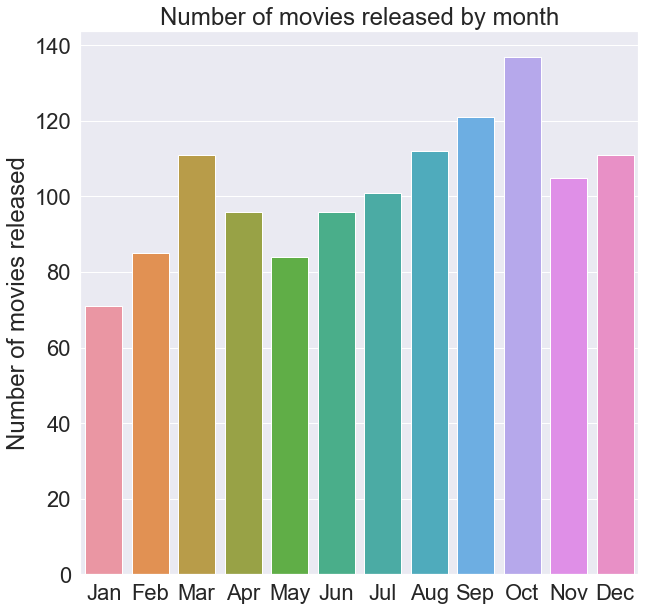

In [27]:
# Plotting the number of movies released by month to get a visual
order_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.set_style('darkgrid')
sns.set(font_scale = 2)
plt.figure(figsize = (10,10))
ax = sns.barplot(x = rm.index, y = rm, order = order_list)
ax.set_title('Number of movies released by month')
ax.set(ylabel = 'Number of movies released');

From the below graph we can see that movies released in May, June, July, November, and December has the highest worldwide box office results, while having less movies released than October and September. 

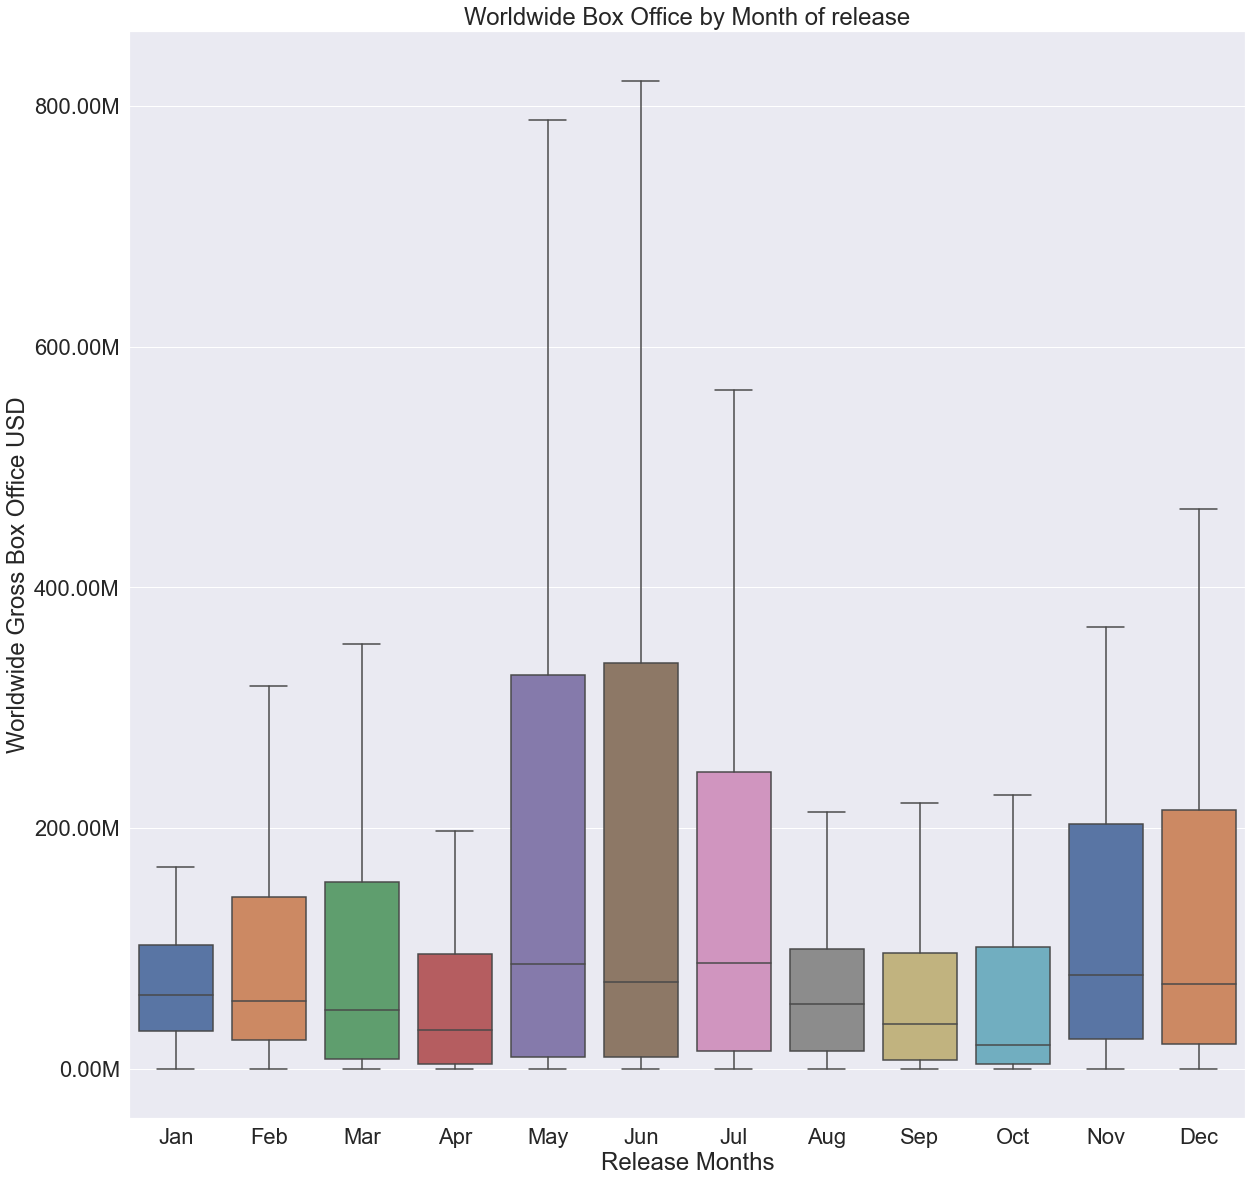

In [28]:
# Using seaborn to show distribution of worldwide gross of movies released by months
order_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.set_style('darkgrid')
sns.set(font_scale = 2)
plt.figure(figsize = (20,20))
ax = sns.boxplot(x = 'month', y = 'worldwide_gross', data = df, palette = 'deep', showfliers = False, order = order_list)
ax.set_title('Worldwide Box Office by Month of release')
ax.set(xlabel = 'Release Months', ylabel = 'Worldwide Gross Box Office USD')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))

#### Genres

Movies with the adventure sub-genre associated to them have highest average worldwide box office gross. Followed by animation and fantasy.

In [29]:
# Seperate sub genres in movies and count them as a movie in each genre.
# Change genre id from a list within a string to a list of strings
df['genre_ids'] = df['genre_ids'].str.strip('[]').str.split(', ') 
genre_data = df.explode('genre_ids')

In [30]:
# create a list to change genre ids into their respective names
# genre list found in TMDB API documentation
genre_list = {'28': 'Action', '12': 'Adventure', '16': 'Animation', '35': 'Comedy', '80': 'Crime', '99': 'Documentary',\
              '18': 'Drama', '10751': 'Family', '14': 'Fantasy', '36': 'History', '27': 'Horror', '10402': 'Music',\
              '9648': 'Mystery', '10749': 'Romance', '878': 'Sci-Fi', '10770': 'TV Movie', '53': 'Thriller', '10752': 'War',\
              '37': 'Western', '': 'No Genre'}
# Chang ids into respective names by passing through the map function
genre_data['genre_ids'] = genre_data['genre_ids'].map(genre_list)

Below results shows the highest number of movies released during this period is associated with the Drama genre followed by Comedy.

In [31]:
gd = genre_data['genre_ids'].value_counts()
gd

Drama          571
Comedy         419
Thriller       354
Action         341
Adventure      234
Crime          177
Sci-Fi         158
Romance        157
Horror         154
Family         144
Fantasy        138
Mystery         93
Animation       83
History         47
Music           38
War             32
Western         17
Documentary     13
No Genre         1
Name: genre_ids, dtype: int64

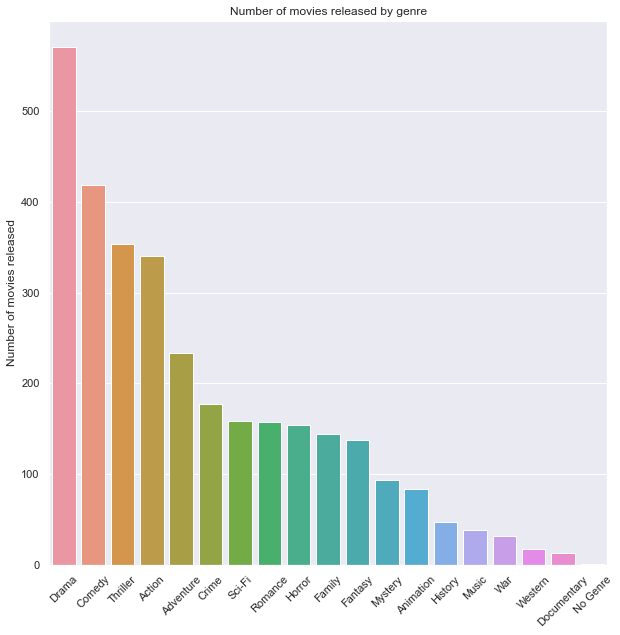

In [32]:
# Plotting the count of movies using.
sns.set_style('darkgrid')
sns.set(font_scale = 1)
plt.figure(figsize = (10,10))
ax = sns.barplot(x = gd.index, y = gd, data = genre_data)
plt.xticks(rotation = 45)
ax.set_title('Number of movies released by genre')
ax.set(ylabel = 'Number of movies released');

In [33]:
# Group movies by their genre while averaging the worldwide_gross
grouped_genre = genre_data.groupby('genre_ids')['worldwide_gross'].mean()

In [34]:
# Sort by worldwide_gross by decsending value
grouped_genre = grouped_genre.sort_values(ascending = False)

Adventure has the highest average worldwide box office results, while having less movies released than Drama.

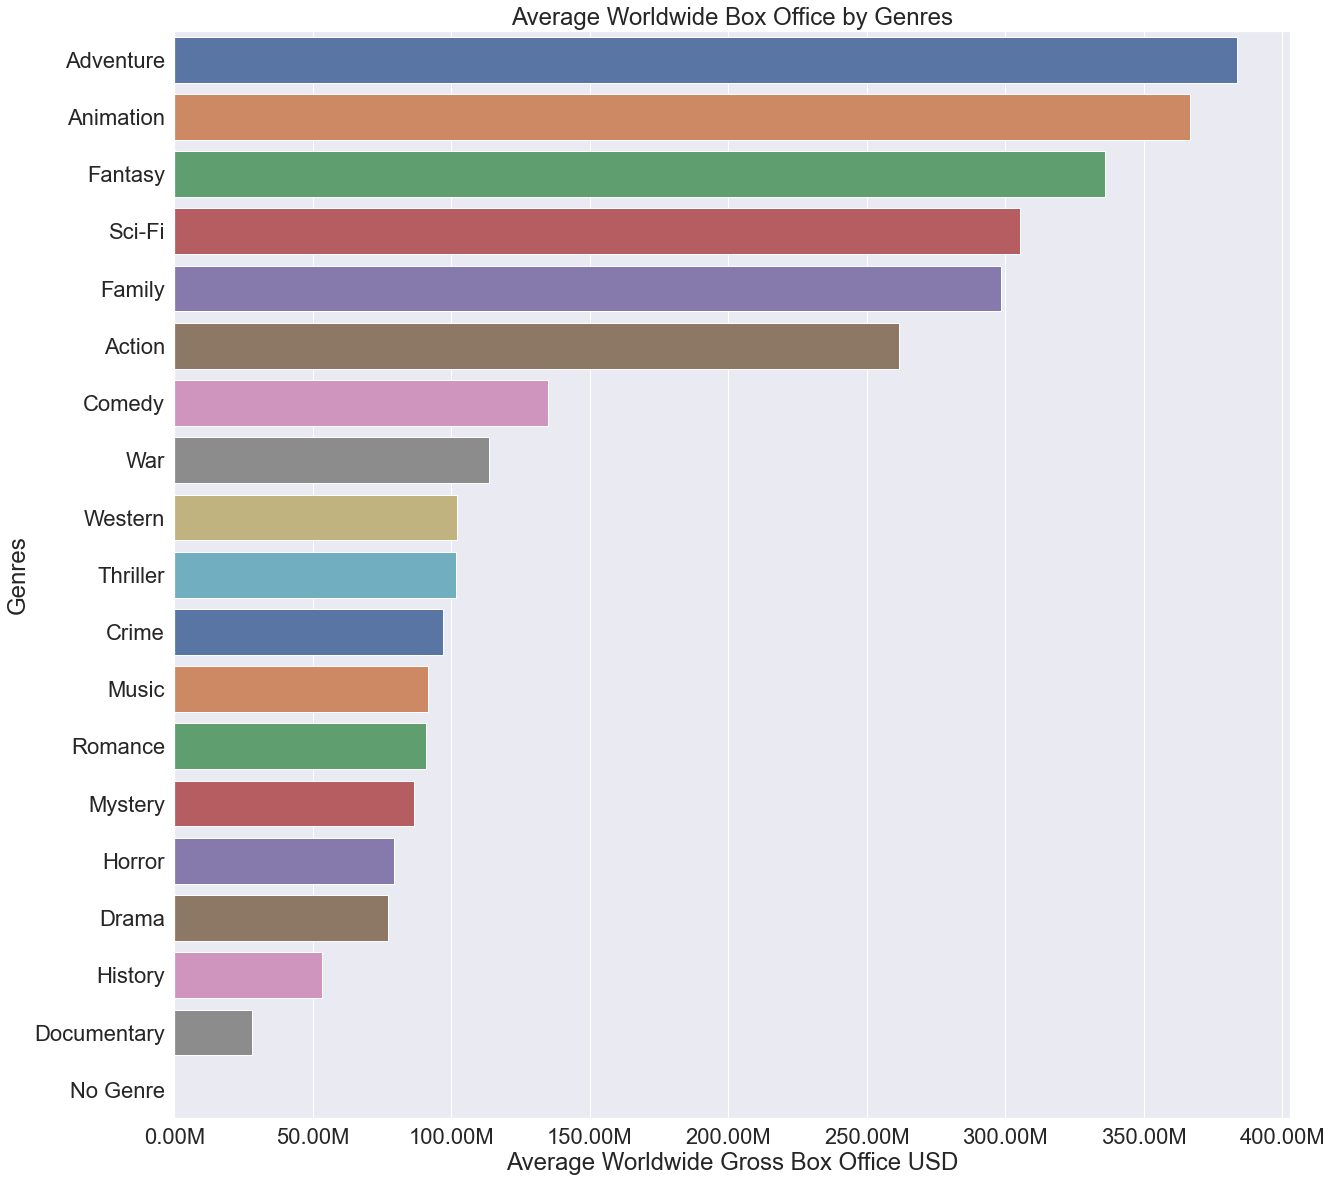

In [35]:
# Plot results
sns.set_style('darkgrid')
sns.set(font_scale = 2)
plt.figure(figsize = (20,20))
ax = sns.barplot(x = grouped_genre, y = grouped_genre.index , palette = 'deep')
ax.set_title('Average Worldwide Box Office by Genres')
ax.set(ylabel = 'Genres', xlabel = 'Average Worldwide Gross Box Office USD')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))
plt.show()

#### Production Budget

A positive correaltion is found between <code>production_budget</code> and <code>worldwide_gross</code>. This shows that higher production budgets tend to result in higher worldwide box office gross.

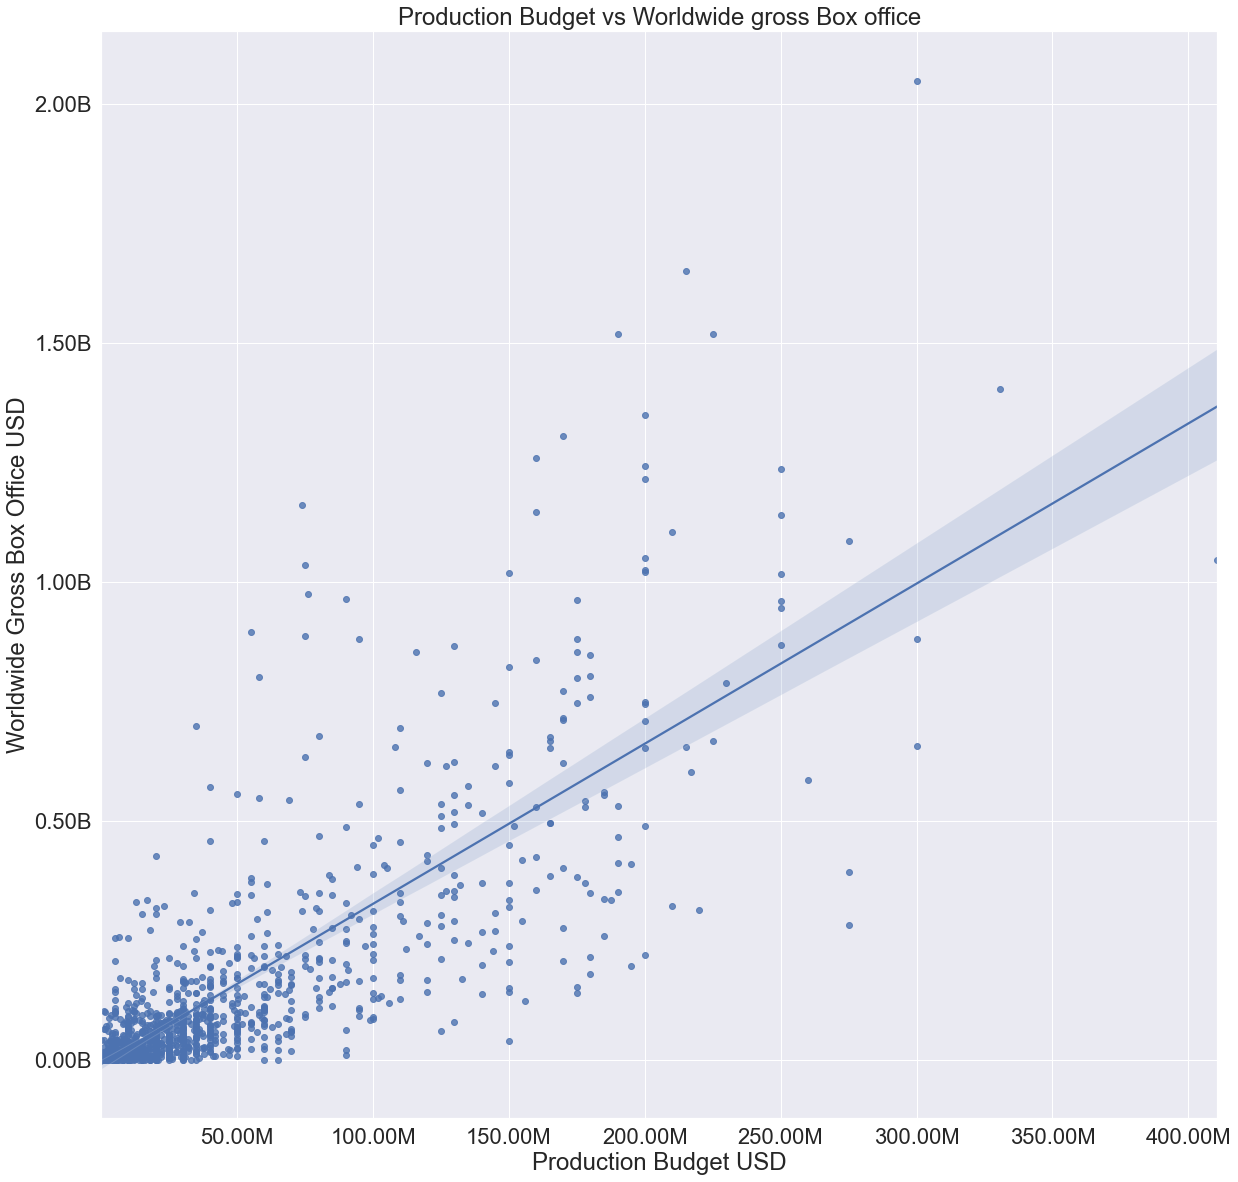

In [36]:
# Create Plot
sns.set_style('darkgrid')
sns.set(font_scale = 2)
plt.figure(figsize = (20,20))
ax = sns.regplot(x = 'production_budget', y = 'worldwide_gross', data = df)
ax.set_title('Production Budget vs Worldwide gross Box office')
ax.set(xlabel = 'Production Budget USD', ylabel = 'Worldwide Gross Box Office USD')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000000) + 'B'))
plt.show()

We want to see what is the minimum production budget needed to ensure a movie's success. Based on whether a movie's box office results made back its production budget, we will create a new column <code>profit</code> that calculates the difference between worldwide gross and production budget.

In [37]:
df['profit'] = df['worldwide_gross'] - df['production_budget']

Based on the value in <code>profit</code>, we will create another column to identify if a movie's success. We will assume a movie has succeed if it has made back it's production budget in worldwide box office gross with Success as breaking even or more and Loss as not making enough to cover the production budget.

In [38]:
df['budget_return'] = df['profit'].map(lambda x: 'Success' if x >= 0 else 'Loss' )

Results show that as production budget increases, the chance of a movie's success increases.

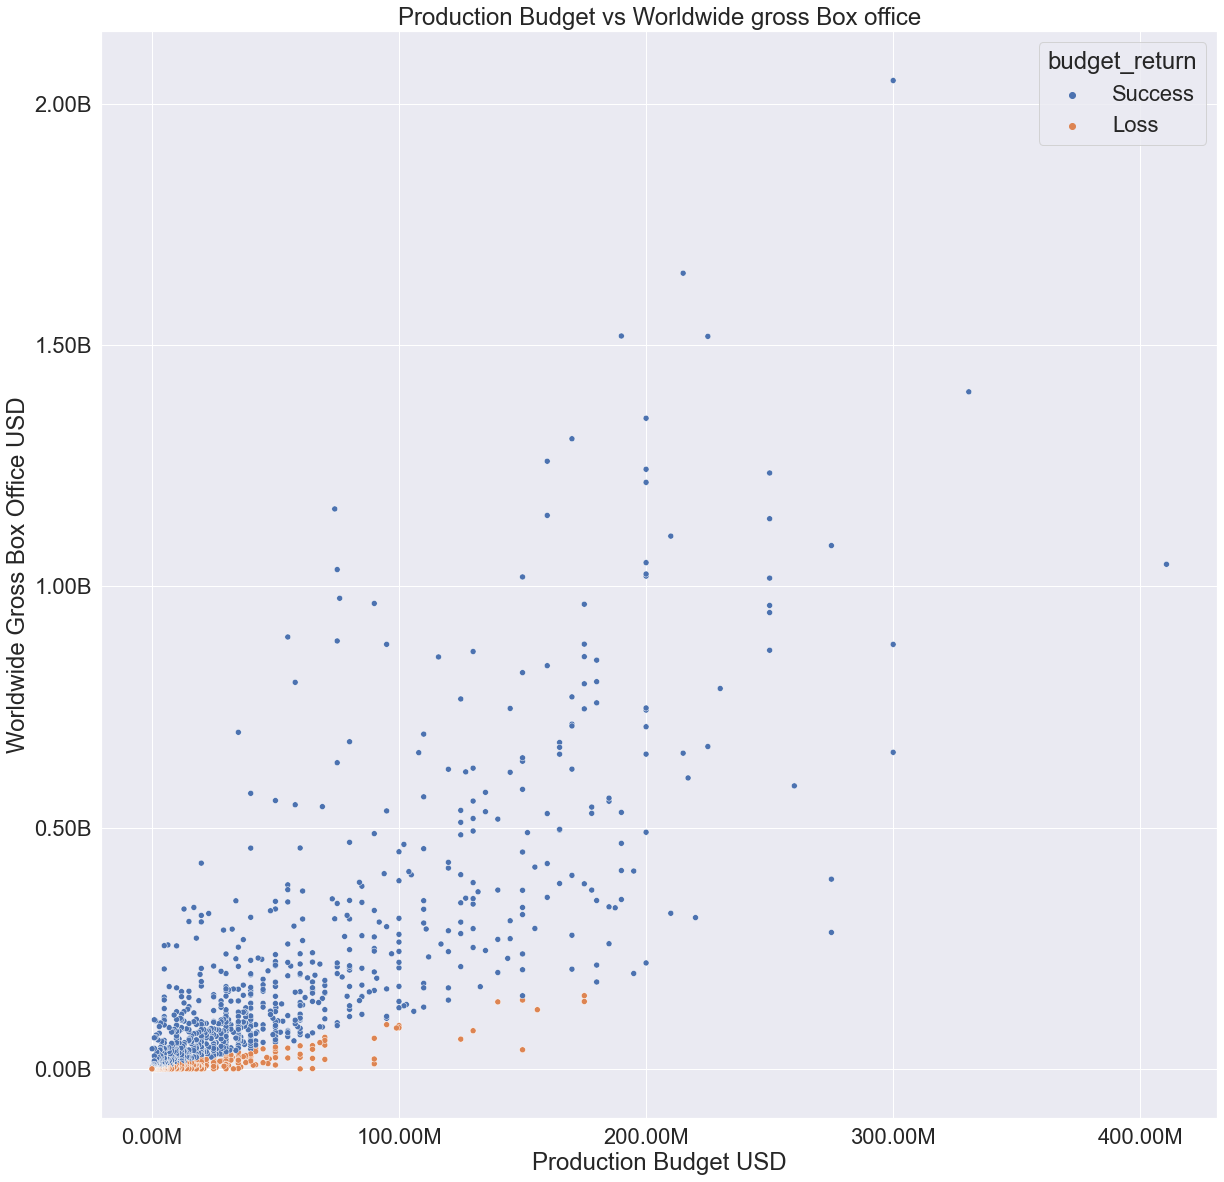

In [39]:
# Create Plot
sns.set_style('darkgrid')
sns.set(font_scale = 2)
plt.figure(figsize = (20,20))
ax = sns.scatterplot(x = 'production_budget', y = 'worldwide_gross', data = df, hue = 'budget_return')
ax.set_title('Production Budget vs Worldwide gross Box office')
ax.set(xlabel = 'Production Budget USD', ylabel = 'Worldwide Gross Box Office USD')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000000) + 'B'))
plt.show()

We will split production budget into different budget categories and calculate the chance of success from each category.

In [40]:
# Create bins to split production budget into
bins = [0, 5000000, 10000000, 25000000, 50000000, 100000000, 150000000, 200000000, np.inf]
bin_list = ['Less than 5M', '5M - 10M', '10M - 25M', '25M - 50M', '50M - 100M', '100M - 150M', '150M - 200M', 'Over 200M']
# Create a new column to identify which budget category the movie belongs to
df['budget_category'] = pd.cut(df['production_budget'], bins = bins, labels = bin_list)
df.head()

,release_date,title,production_budget,worldwide_gross,genre_ids,id,month,profit,budget_return,budget_category
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,"[12, 28, 14]",1865,May,635063875,Success,Over 200M
1,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,"[28, 12, 878]",99861,May,1072413963,Success,Over 200M
2,2018-04-27,Avengers: Infinity War,300000000,2048134200,"[12, 28, 14]",299536,Apr,1748134200,Success,Over 200M
3,2017-11-17,Justice League,300000000,655945209,"[28, 12, 14, 878]",141052,Nov,355945209,Success,Over 200M
4,2015-11-06,Spectre,300000000,879620923,"[28, 12, 80]",206647,Nov,579620923,Success,Over 200M


To find the chance of success, we group up the movies based on buget category and count the values. We then normalize the values to find the percent of success and loss. 

In [50]:
rate = df.groupby('budget_category')['budget_return'].value_counts(normalize = True)
rate

budget_category  budget_return
Less than 5M     Success          0.522088
                 Loss             0.477912
5M - 10M         Success          0.632000
                 Loss             0.368000
10M - 25M        Success          0.698885
                 Loss             0.301115
25M - 50M        Success          0.784314
                 Loss             0.215686
50M - 100M       Success          0.859756
                 Loss             0.140244
100M - 150M      Success          0.936709
                 Loss             0.063291
150M - 200M      Success          0.953846
                 Loss             0.046154
Over 200M        Success          1.000000
Name: budget_return, dtype: float64

Using unstack function, we pivot the dataframe to show Success and Loss columns for each budget category.

In [51]:
ratedf = rate.unstack('budget_return')
ratedf

budget_return,Loss,Success
budget_category,,
Less than 5M,0.477912,0.522088
5M - 10M,0.368000,0.632000
10M - 25M,0.301115,0.698885
25M - 50M,0.215686,0.784314
50M - 100M,0.140244,0.859756
100M - 150M,0.063291,0.936709
150M - 200M,0.046154,0.953846
Over 200M,NaN,1.000000


Results show if 100-150 million on production budget there is a 93.7% chance the movie will succeed.

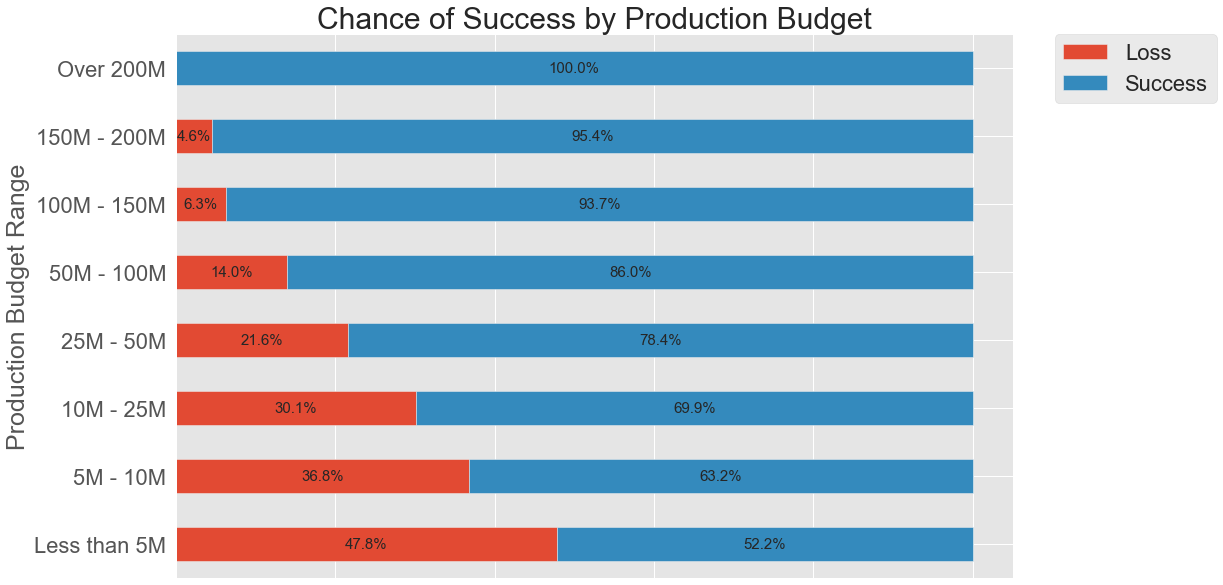

In [52]:
# Plot a stacked bar graph of Success and Loss in budget return based on budget category
plt.style.use('ggplot')
ax = ratedf.plot.barh(figsize = (15,10), stacked = True);
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{(width*100):.1f}%'  # format text to show only 1 decimal place in percentage
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=15)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.xaxis.set_ticklabels([])
ax.set_ylabel('Production Budget Range', fontsize = 25)
ax.set_title('Chance of Success by Production Budget', fontsize = 30)
plt.show()

## Conclusions

This analysis leads to three recommendations to help Microsoft in deciding what movies to make:

- __Time of release.__ The months leading up to summer, May, June, July have shown to have brought back higher box office totals.

- __Type of movie.__ While there are alot of different genres and sub genres in movies now. Movies with higher box office totals have shown to be of the adventure genre.

- __Price of success.__ Analysis shows spending a minimum of 100 million dollars will give a high chance of bring back a positive return on investment.

There are many variables to examine to predict box office success of a movie. This analysis only looked at three of them.
 
## Next Steps

Further data and analysis can help Microsoft narrow down their decision making.

- __Marketing plays a big part in movie sucess.__  Examing this data could give insights on how audiences respond to different marketing techniques when promoting a movie.
- __Other markets.__ In this analysis we only looked at worldwide box office gross as the deciding factor to success. With the growth of streaming services, we can look at these other forms of revenue to help with decision making.

